In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler as SSc
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
import matplotlib.pyplot as plt
%matplotlib inline

#set width of window to preference
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
data = pd.read_csv("Data-Prepped.csv",index_col=0)
data = data.astype(np.float32)
data.head()

,Bronze,Silver,Gold,Platinum,Diamond,Master,GrandMaster,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,10.0,3000.0,143.718002,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.667702,40.867298,4.7508,28.0,0.001397,6.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,23.0,10.0,5000.0,129.232193,0.003304,0.000259,4.0,0.000294,0.000432,0.004307,32.919399,42.345402,4.8434,22.0,0.001194,5.0,0.0,0.000208
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,30.0,10.0,200.0,69.961197,0.001101,0.000336,4.0,0.000294,0.000461,0.002926,44.647499,75.354797,4.0430,22.0,0.000745,6.0,0.0,0.000189
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,19.0,20.0,400.0,107.601601,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.220301,53.735199,4.9155,19.0,0.000426,7.0,0.0,0.000384
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,32.0,10.0,500.0,122.890800,0.001136,0.000327,2.0,0.000000,0.001329,0.002368,22.688499,62.081299,9.3740,15.0,0.001174,4.0,0.0,0.000019


## 1 - Trying to predict the league (approximate skill level) in which the game was played

#### Split data into X,Y where Y is which league the game was played in, then normalize the inputs.

In [3]:
# Bronze-GrandMaster as Y and all others (not including LeagueIndex) as X
X = data.iloc[:,8:]
Y = data.iloc[:,:7]

def SSc_normalize(X):
    #transform input data (normalize)
    ssc = SSc()
    Xft = ssc.fit_transform(X)
    X = pd.DataFrame(Xft)
    return X
def MMC_normalize(X):
    #transform input data (normalize)
    mms = MMS()
    Xft = mms.fit_transform(X)
    X = pd.DataFrame(Xft)
    return X

X_SSc = SSc_normalize(X)
X_MMC = MMC_normalize(X)

print("Xtr(Xtrain),Xtst(Xtest),Ytr(Ytrain),Ytst(Ytest) shapes: ")
Xtr,Xtst,Ytr,Ytst = train_test_split(X_SSc,Y,test_size=0.2)#,random_state=2021)
print(Xtr.shape,Xtst.shape,Ytr.shape,Ytst.shape)

Xtr_MMC,Xtst_MMC,Ytr_MMC,Ytst_MMC = train_test_split(X_MMC,Y,test_size=0.2)#,random_state=2021)

Xtr(Xtrain),Xtst(Xtest),Ytr(Ytrain),Ytst(Ytest) shapes: 
(2670, 18) (668, 18) (2670, 7) (668, 7)


#### Create and train models on training data then check their accuracy on test data to check accuracy of region prediction

In [4]:
print("Classifier scores:\n"+"-"*18+"\n")

tree = DTC(max_depth=5)
tree.fit(Xtr,Ytr)
scr = cross_val_score(tree,Xtst,Ytst, cv=5)
print("Tree \nscore avg:"+str(sum(scr)/5)+"\nscore = "+str(scr)+"\n\n"+"-"*64)

for i in range(1,20,2):
    forest = RFC(n_estimators=i,max_depth=5)
    forest.fit(Xtr,Ytr)
    scr = cross_val_score(forest,Xtst,Ytst, cv=5)
    print("\nRandom Forest trees = "+str(i)+" depth = 5 \nscore avg: "+str(sum(scr)/5)+" \nscores: "+str(scr))

print("\n"+"-"*64)
    
for i in range(1,16,3):
    knn = KNC(n_neighbors=i)
    knn.fit(Xtr,Ytr)
    scr = cross_val_score(knn,Xtst,Ytst, cv=5)
    print("\nK-Nearest Neighbors "+str(i)+"-neighbors\nscore avg:"+str(sum(scr)/5)+"\nscore = "+
          str(scr))

Classifier scores:
------------------

Tree 
score avg:0.2034564021995287
score = [0.26119403 0.15671642 0.28358209 0.15037594 0.16541353]

----------------------------------------------------------------

Random Forest trees = 1 depth = 5 
score avg: 0.22174840085287845 
scores: [0.19402985 0.2761194  0.06716418 0.30075188 0.27067669]

Random Forest trees = 3 depth = 5 
score avg: 0.10473571989675681 
scores: [0.13432836 0.11940299 0.09701493 0.09774436 0.07518797]

Random Forest trees = 5 depth = 5 
score avg: 0.09730669958478286 
scores: [0.08955224 0.1119403  0.08955224 0.09774436 0.09774436]

Random Forest trees = 7 depth = 5 
score avg: 0.08228032768488384 
scores: [0.10447761 0.08208955 0.09701493 0.03759398 0.09022556]

Random Forest trees = 9 depth = 5 
score avg: 0.07782515991471214 
scores: [0.09701493 0.09701493 0.05223881 0.08270677 0.06015038]

Random Forest trees = 11 depth = 5 
score avg: 0.06733251038042869 
scores: [0.1119403  0.06716418 0.04477612 0.06766917 0.045112

In [5]:
DT = []
KN = []
RF = []
def cscore(model,X,Y):
    cr_v = cross_validate(model, X, Y, scoring=scoring,cv=5, return_train_score=False)
    return cr_v
breakline = "-"*64
scoring = {'FVE': 'explained_variance',
           'MSE': 'neg_mean_squared_error',
           'R2': 'r2'}
def test(X,Y):
    #DTree
    for i in range(1,3):
        dpth = i
        tree = DTC(max_depth=dpth)
        tree.fit(Xtr,Ytr)
        scr = cscore(tree,Xtst,Ytst)
        print("\n"+"-"*10+"Decision Tree, depth of {}:".format(dpth))
        for j,k in enumerate(scr.keys()):
            if j > 1:
                if(k=='test_MSE'):
                    print("-----{} (0.0 is best)\navg score: {}\nscores:   {}".format(k,scr[k].mean(),scr[k]))
                else:
                    print("-----{} (1.0 is best)\navg score: {}\nscores:   {}".format(k,scr[k].mean(),scr[k]))
            
        
    print("\n\n"+"-"*36)
    #KNN
    for l in range(1,101,20):
        knn = KNC(n_neighbors=l)
        knn.fit(Xtr,Ytr)
        scr = cscore(knn,Xtst,Ytst)
        print("\n"+"-"*10+"K-Nearest Neighbors, {}-neighbors scores:".format(l))
        for j,k in enumerate(scr.keys()):
            if j > 1:
                if(k=='test_MSE'):
                    print("-----{} (0.0 is best)\navg score: {}\nscores:   {}".format(k,scr[k].mean(),scr[k]))
                else:
                    print("-----{} (1.0 is best)\navg score: {}\nscores:   {}".format(k,scr[k].mean(),scr[k]))
                    
            
    print("\n\n"+"-"*36)
    
    #Random Forest
    dpth=4
    for l in range(1,31,10): #change number of trees
        forest = RFC(n_estimators=l,max_depth=dpth)
        forest.fit(Xtr,Ytr)
        scr = cscore(forest,Xtst,Ytst)
        print("\n"+"-"*10+"Random Forest, {} trees of depth {} scores:".format(l,dpth))
        for j,k in enumerate(scr.keys()):
            if j > 1:
                if(k=='test_MSE'):
                    print("-----{} (0.0 is best)\navg score: {}\nscores:   {}".format(k,scr[k].mean(),scr[k]))
                else:
                    print("-----{} (1.0 is best)\navg score: {}\nscores:   {}".format(k,scr[k].mean(),scr[k]))
            

            
    
    print()
test(X,Y)


----------Decision Tree, depth of 1:
-----test_FVE (1.0 is best)
avg score: 0.028571631227220805
scores:   [0.00000000e+00 2.55448478e-07 1.42857075e-01 4.25747463e-07
 4.00202615e-07]
-----test_MSE (0.0 is best)
avg score: -0.1428571492433548
scores:   [-0.14285715 -0.14285715 -0.14285715 -0.14285715 -0.14285715]
-----test_R2 (1.0 is best)
avg score: -0.15064314078090923
scores:   [-0.17750418 -0.17703627 -0.04039133 -0.1776191  -0.18066481]

----------Decision Tree, depth of 2:
-----test_FVE (1.0 is best)
avg score: -0.015064314433506556
scores:   [-0.04410059 -0.04925038  0.14285707 -0.02795205 -0.09687562]
-----test_MSE (0.0 is best)
avg score: -0.1456434339284897
scores:   [-0.14498936 -0.14498936 -0.14285715 -0.14285715 -0.15252416]
-----test_R2 (1.0 is best)
avg score: -0.1698131624876523
scores:   [-0.19007749 -0.19028851 -0.04039133 -0.1776191  -0.25068938]


------------------------------------

----------K-Nearest Neighbors, 1-neighbors scores:
-----test_FVE (1.0 is best)
a

............
Predicting a player's league


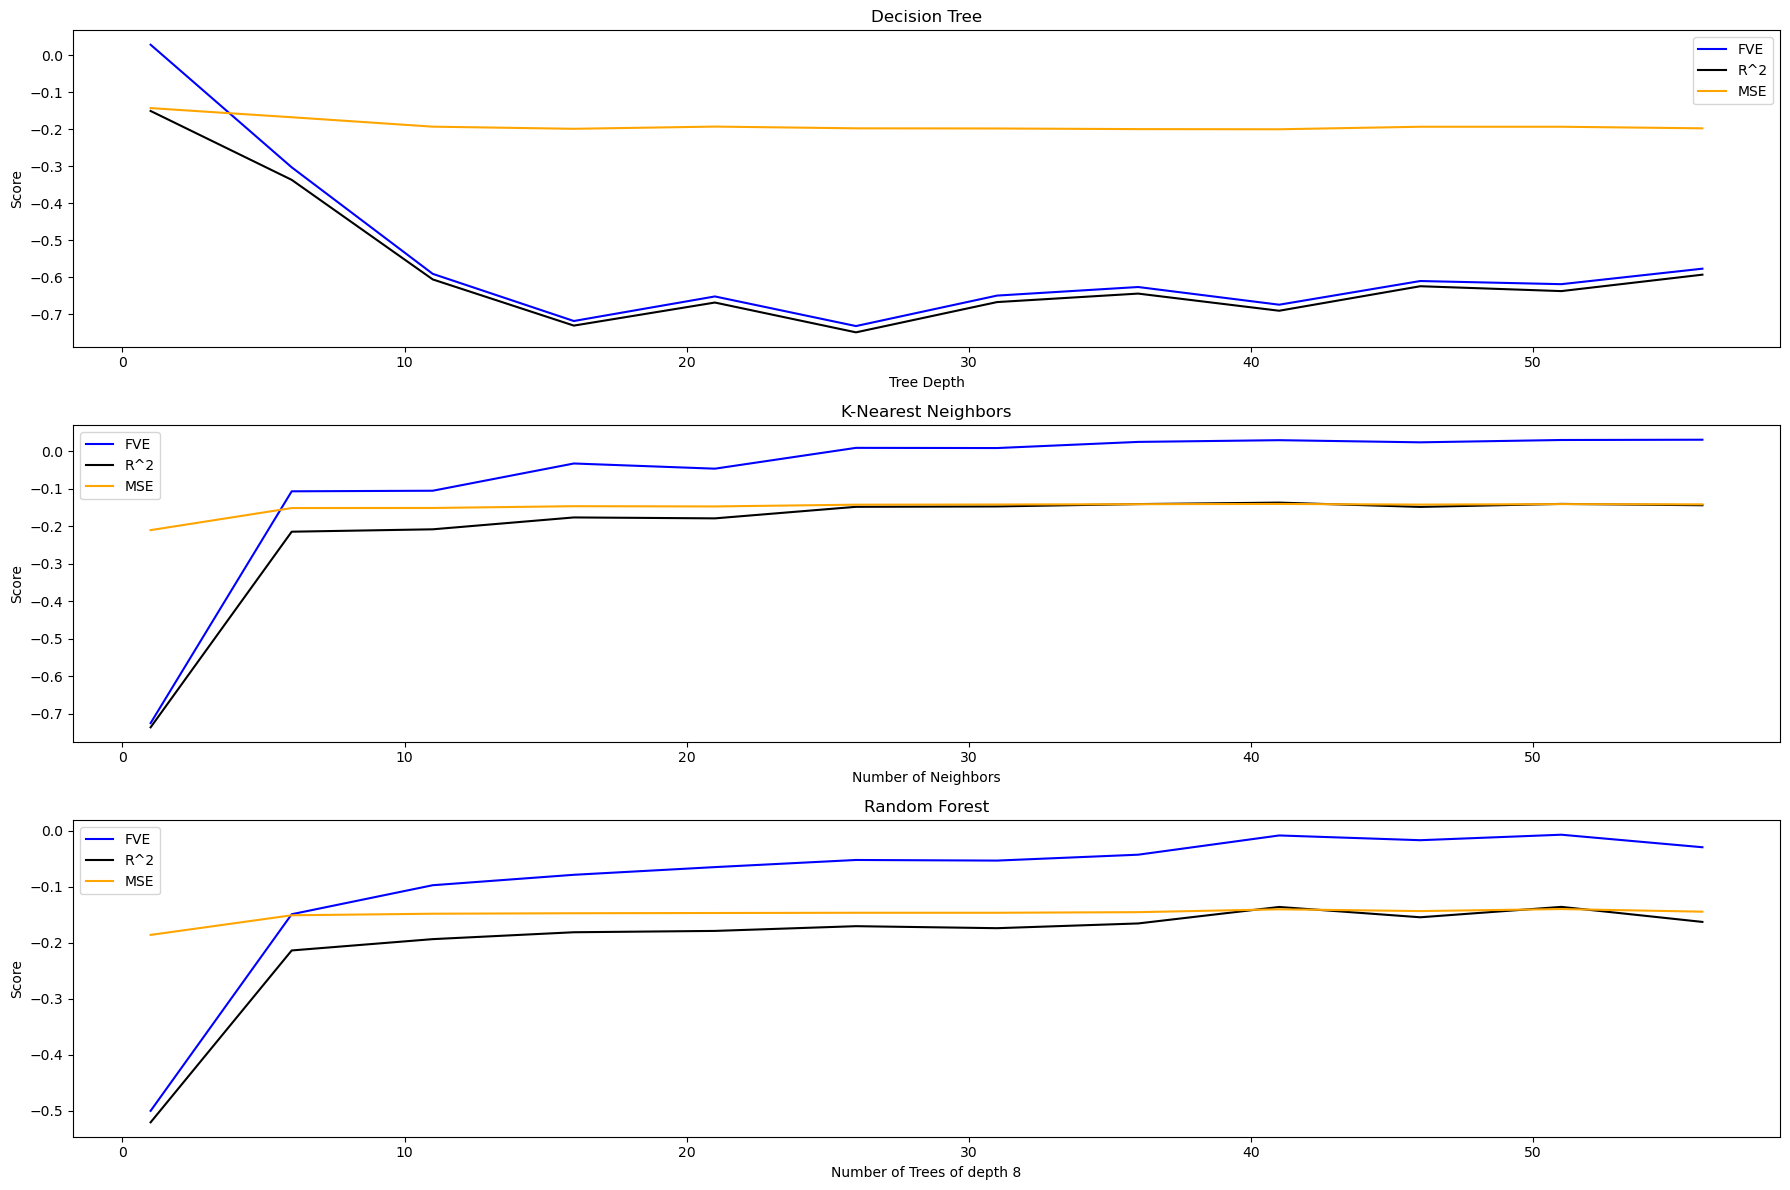

In [6]:
def testGraph(X,Y):
    scores = [
        [[],[],[]],  #decision tree       -- [test_FVE],[test_MSE],[test_R^2]
        [[],[],[]],  #K-Nearest Neighbors -- [test_FVE],[test_MSE],[test_R^2]
        [[],[],[]]   #Random Forest       -- [test_FVE],[test_MSE],[test_R^2]
    ]
    x = []
    
    RFDpth=8
    for l in range(1,60,5):
        x.append(l)
        dpth = l
        tree = DTC(max_depth=dpth)
        tree.fit(Xtr,Ytr)
        scr = cscore(tree,Xtst,Ytst)
        for k in scr.keys():
            if(k=='test_FVE'):
                scores[0][0].append(scr[k].mean())
            elif(k=='test_MSE'):
                scores[0][1].append(scr[k].mean())
            elif(k=='test_R2'):
                scores[0][2].append(scr[k].mean())
        
        #KNN
        knn = KNC(n_neighbors=l)
        knn.fit(Xtr,Ytr)
        scr = cscore(knn,Xtst,Ytst)
        for k in scr.keys():
            if(k=='test_FVE'):
                scores[1][0].append(scr[k].mean())
            elif(k=='test_MSE'):
                scores[1][1].append(scr[k].mean())
            elif(k=='test_R2'):
                scores[1][2].append(scr[k].mean())
    
        #Random Forest
        forest = RFC(n_estimators=l,max_depth=RFDpth)
        forest.fit(Xtr,Ytr)
        scr = cscore(forest,Xtst,Ytst)
        for k in scr.keys():
            if(k=='test_FVE'):
                scores[2][0].append(scr[k].mean())
            elif(k=='test_MSE'):
                scores[2][1].append(scr[k].mean())
            elif(k=='test_R2'):
                scores[2][2].append(scr[k].mean())

        print('.', end="")
        if ((l+1)%10==0):
            print(l+1)
            
    print("\nPredicting a player's league")    
    fig,ax = plt.subplots(3, figsize=(18,12), dpi=100)
    ax[0].plot(x, scores[0][0], color='blue', label='FVE')
    ax[0].plot(x, scores[0][2], color='black', label='R^2' )
    ax[0].plot(x, scores[0][1], color='orange', label='MSE')
    ax[0].set_title("Decision Tree")
    ax[0].set_xlabel("Tree Depth")
    
    ax[1].plot(x, scores[1][0], color='blue', label='FVE')
    ax[1].plot(x, scores[1][2], color='black', label='R^2' )
    ax[1].plot(x, scores[1][1], color='orange', label='MSE')
    ax[1].set_title("K-Nearest Neighbors")
    ax[1].set_xlabel("Number of Neighbors")
    
    ax[2].plot(x, scores[2][0], color='blue', label='FVE')
    ax[2].plot(x, scores[2][2], color='black', label='R^2' )
    ax[2].plot(x, scores[2][1], color='orange', label='MSE')
    ax[2].set_title("Random Forest")
    ax[2].set_xlabel(f"Number of Trees of depth {RFDpth}")
    
    for i in range(3):
        ax[i].legend()
        ax[i].set_ylabel("Score")
    plt.tight_layout()
    plt.show()
testGraph(X,Y)

.........10
..........20
.....
Predicting a player's league
Closer to Zero is Better


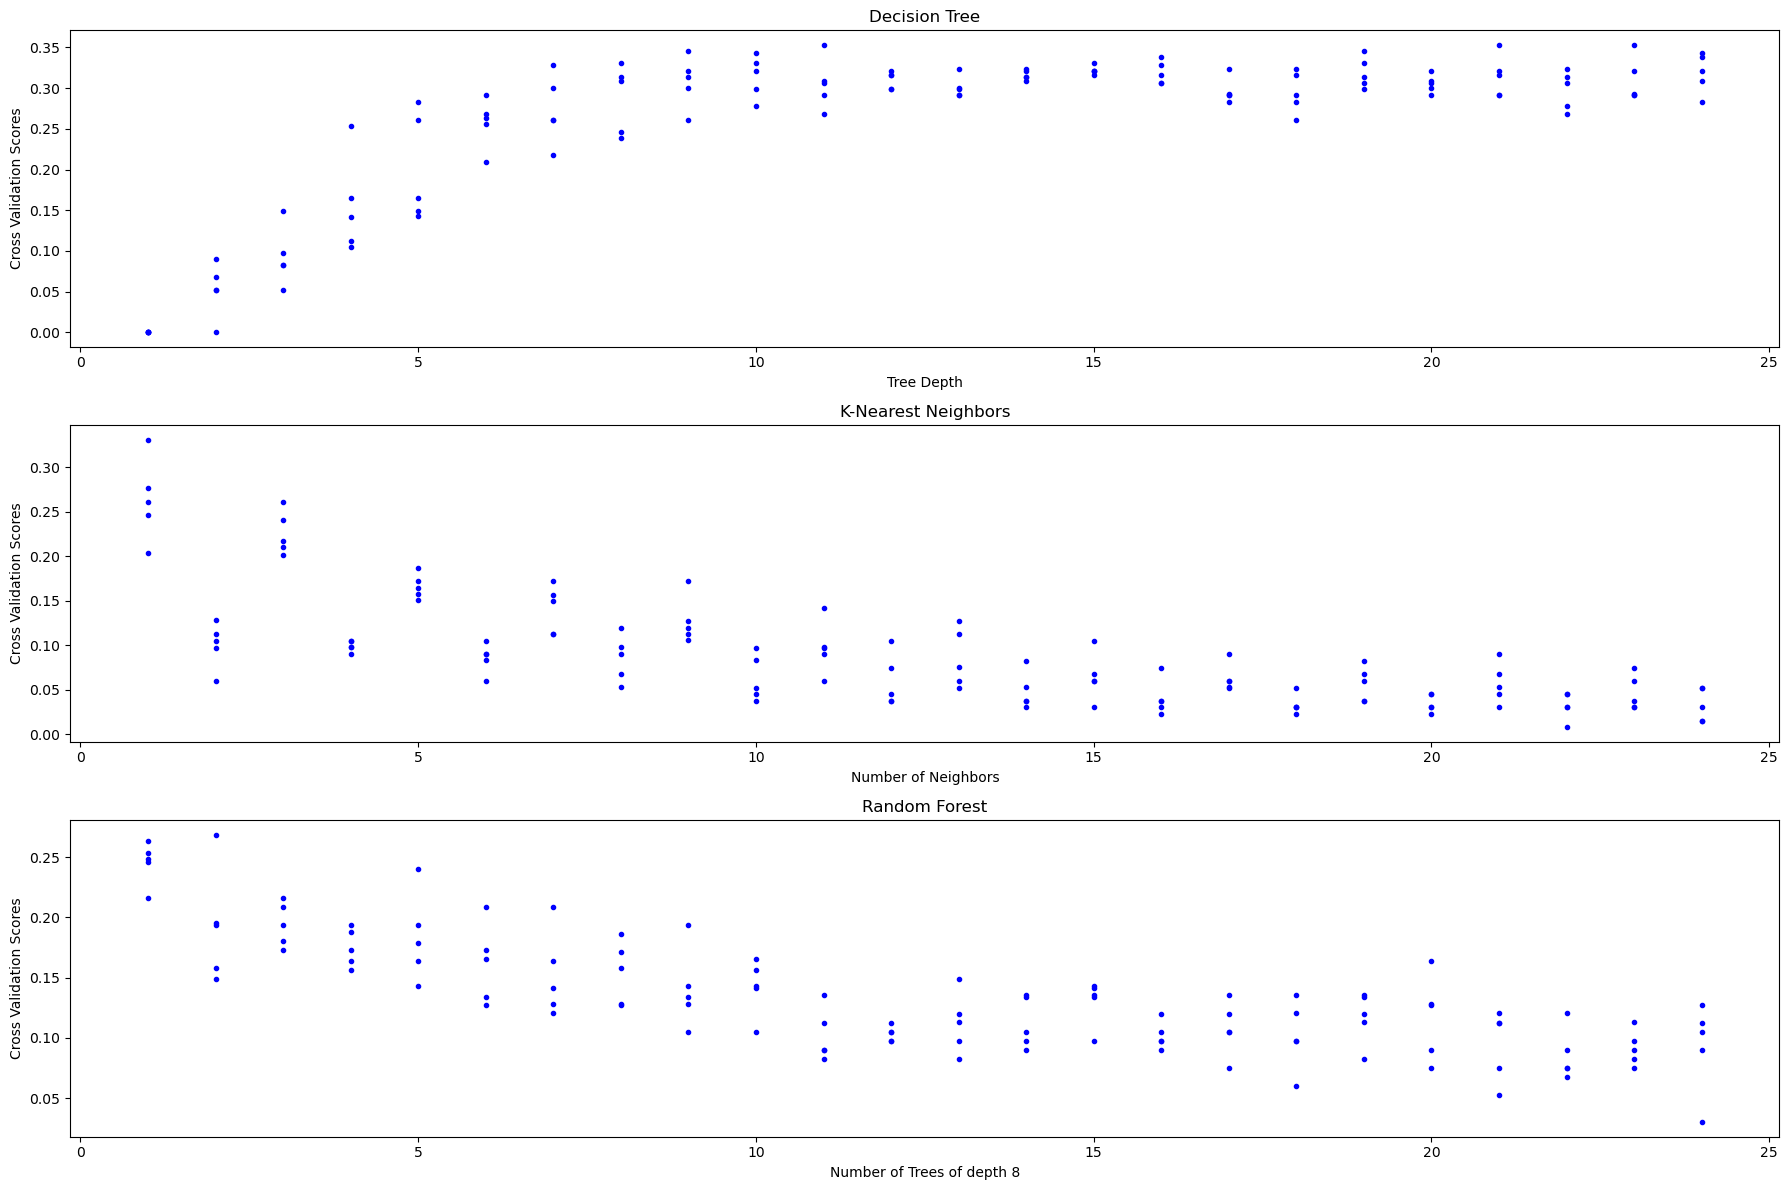

In [7]:
def crossScore(model, X, Y):
    cvs = cross_val_score(model,X,Y,cv=5,scoring='accuracy')
    return cvs

def testGraph(X,Y):
    scores = [[],[],[]]
    x = []
    
    RFDpth=8
    lsum=0
    for l in range(1,25):
        lsum+=1
        x.append(l)
        dpth = l
        tree = DTC(max_depth=dpth)
        tree.fit(Xtr,Ytr)
        scr = crossScore(tree,Xtst,Ytst)
        scores[0].append(scr)
        
        #KNN
        knn = KNC(n_neighbors=l)
        knn.fit(Xtr,Ytr)
        scr = crossScore(knn,Xtst,Ytst)
        scores[1].append(scr)
    
        #Random Forest
        forest = RFC(n_estimators=l,max_depth=RFDpth)
        forest.fit(Xtr,Ytr)
        scr = crossScore(forest,Xtst,Ytst)
        scores[2].append(scr)

        print('.', end="")
        if ((l+1)%10==0):
            print(l+1)
            
    print("\nPredicting a player's league\nCloser to Zero is Better")
    for i in (scores[:][1]):
        i = -i
    
    fig,ax = plt.subplots(3, figsize=(18,12), dpi=100)
    iList = []
    for h in range(3):
        for i in range(5):
            iList = []
            for j in range(lsum):
                iList.append(scores[h][j][i])
            ax[h].scatter(x, iList, color='blue',marker='.', label='Cross Validation Score')
            
    ax[0].set_title("Decision Tree")
    ax[0].set_xlabel("Tree Depth")
    
    
    ax[1].set_title("K-Nearest Neighbors")
    ax[1].set_xlabel("Number of Neighbors")
    
    
    ax[2].set_title("Random Forest")
    ax[2].set_xlabel(f"Number of Trees of depth {RFDpth}")
    
    for i in range(3):
        #ax[i].legend()
        ax[i].set_ylabel("Cross Validation Scores")
    plt.tight_layout()
    plt.show()
testGraph(X,Y)

### Now try with MinMaxScaler instead of StandardScaler

............
Predicting a player's league


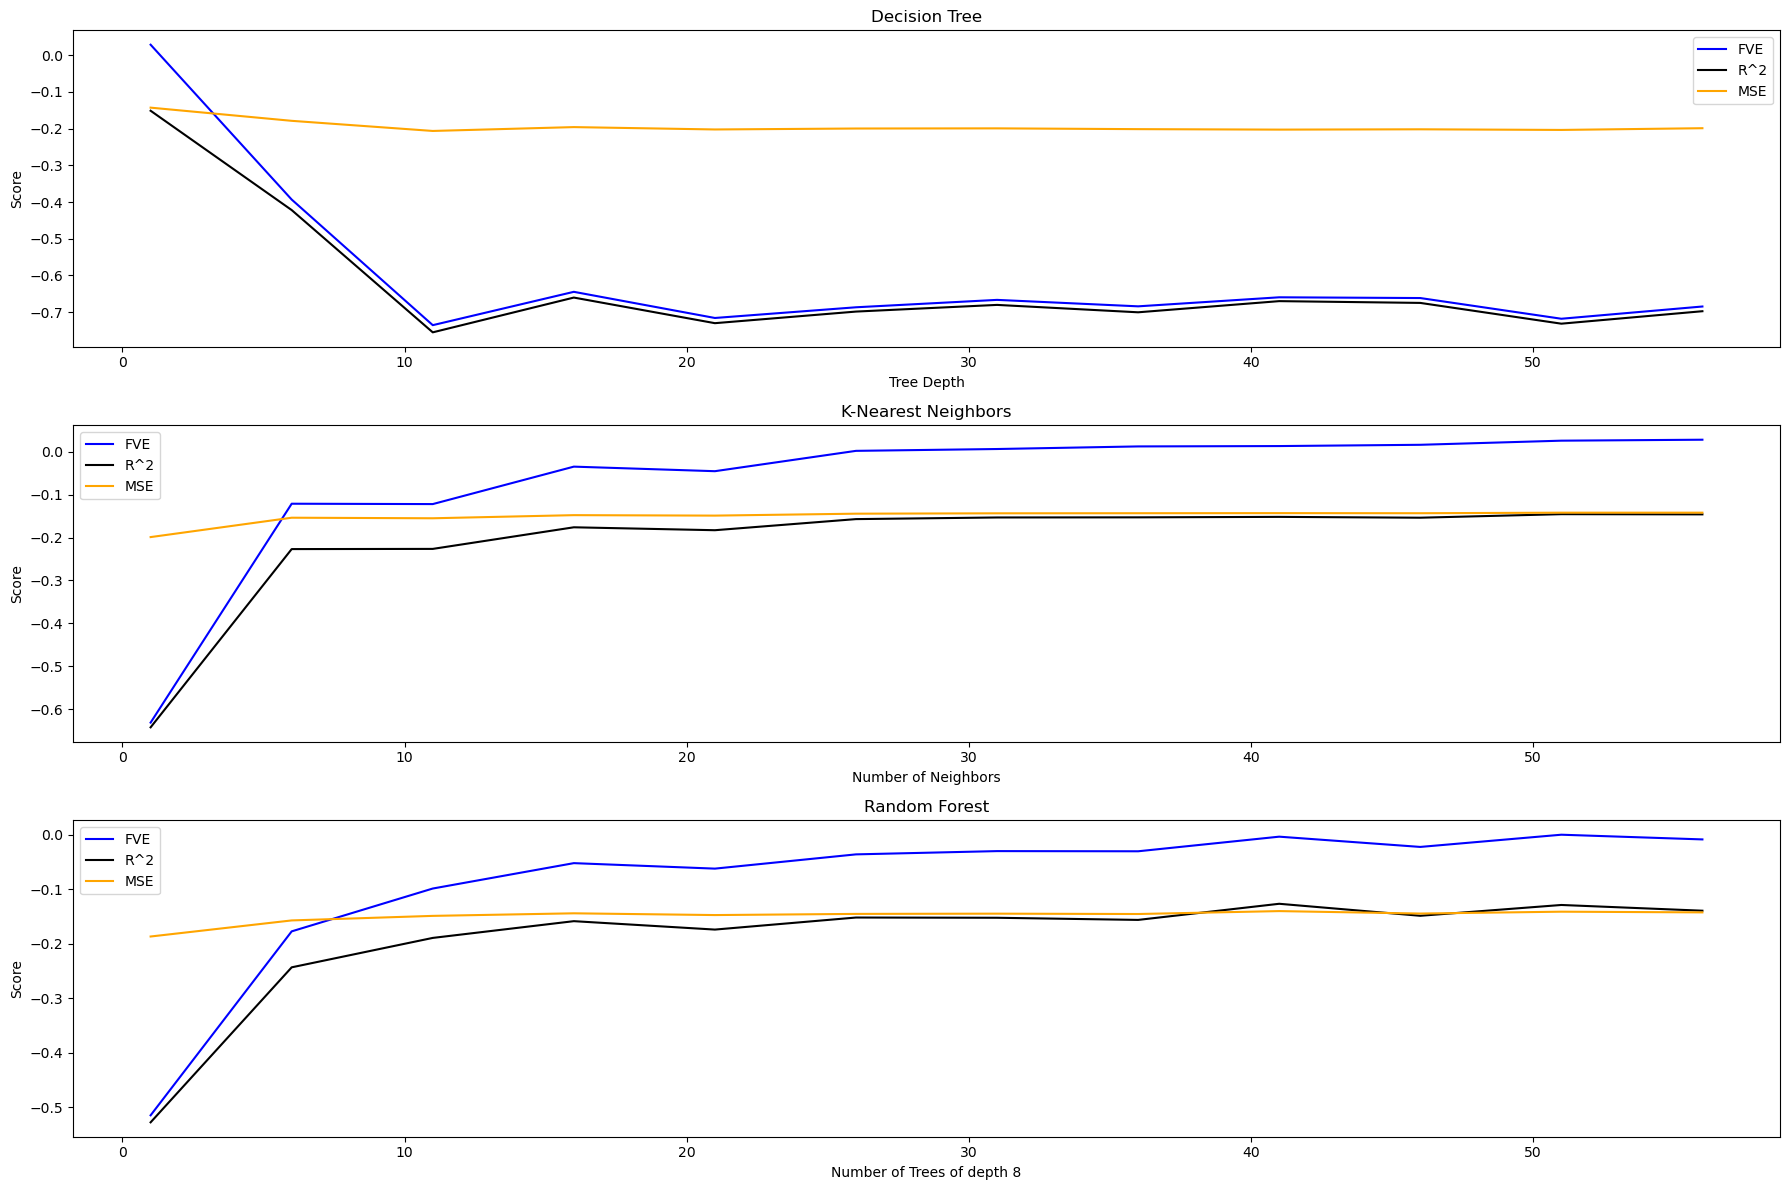

In [8]:
def testGraph(X,Y):
    scores = [
        [[],[],[]],  #decision tree       -- [test_FVE],[test_MSE],[test_R^2]
        [[],[],[]],  #K-Nearest Neighbors -- [test_FVE],[test_MSE],[test_R^2]
        [[],[],[]]   #Random Forest       -- [test_FVE],[test_MSE],[test_R^2]
    ]
    x = []
    
    RFDpth=8
    for l in range(1,60,5):
        x.append(l)
        dpth = l
        tree = DTC(max_depth=dpth)
        tree.fit(Xtr_MMC,Ytr_MMC)
        scr = cscore(tree,Xtst_MMC,Ytst_MMC)
        for k in scr.keys():
            if(k=='test_FVE'):
                scores[0][0].append(scr[k].mean())
            elif(k=='test_MSE'):
                scores[0][1].append(scr[k].mean())
            elif(k=='test_R2'):
                scores[0][2].append(scr[k].mean())
        
        #KNN
        knn = KNC(n_neighbors=l)
        knn.fit(Xtr_MMC,Ytr_MMC)
        scr = cscore(knn,Xtst_MMC,Ytst_MMC)
        for k in scr.keys():
            if(k=='test_FVE'):
                scores[1][0].append(scr[k].mean())
            elif(k=='test_MSE'):
                scores[1][1].append(scr[k].mean())
            elif(k=='test_R2'):
                scores[1][2].append(scr[k].mean())
    
        #Random Forest
        forest = RFC(n_estimators=l,max_depth=RFDpth)
        forest.fit(Xtr_MMC,Ytr_MMC)
        scr = cscore(forest,Xtst_MMC,Ytst_MMC)
        for k in scr.keys():
            if(k=='test_FVE'):
                scores[2][0].append(scr[k].mean())
            elif(k=='test_MSE'):
                scores[2][1].append(scr[k].mean())
            elif(k=='test_R2'):
                scores[2][2].append(scr[k].mean())

        print('.', end="")
        if ((l+1)%10==0):
            print(l+1)
            
    print("\nPredicting a player's league")    
    fig,ax = plt.subplots(3, figsize=(18,12), dpi=100)
    ax[0].plot(x, scores[0][0], color='blue', label='FVE')
    ax[0].plot(x, scores[0][2], color='black', label='R^2' )
    ax[0].plot(x, scores[0][1], color='orange', label='MSE')
    ax[0].set_title("Decision Tree")
    ax[0].set_xlabel("Tree Depth")
    
    ax[1].plot(x, scores[1][0], color='blue', label='FVE')
    ax[1].plot(x, scores[1][2], color='black', label='R^2' )
    ax[1].plot(x, scores[1][1], color='orange', label='MSE')
    ax[1].set_title("K-Nearest Neighbors")
    ax[1].set_xlabel("Number of Neighbors")
    
    ax[2].plot(x, scores[2][0], color='blue', label='FVE')
    ax[2].plot(x, scores[2][2], color='black', label='R^2' )
    ax[2].plot(x, scores[2][1], color='orange', label='MSE')
    ax[2].set_title("Random Forest")
    ax[2].set_xlabel(f"Number of Trees of depth {RFDpth}")
    
    for i in range(3):
        ax[i].legend()
        ax[i].set_ylabel("Score")
    plt.tight_layout()
    plt.show()
testGraph(X,Y)

##### From the testing of various parameters with the above code, it seems optimal to use a between 7 and 11 neighbors for KNN and to use about 5 trees of depth 2-3 for random forests, but it seems impossible to get good results based on the current setup

## Grouped Leagues: 3 Groups

Xtr(Xtrain),Xtst(Xtest),Ytr(Ytrain),Ytst(Ytest) shapes: 
(2670, 19) (668, 19) (2670, 2) (668, 2)
.......20
..........50
...
Predicting a player's league


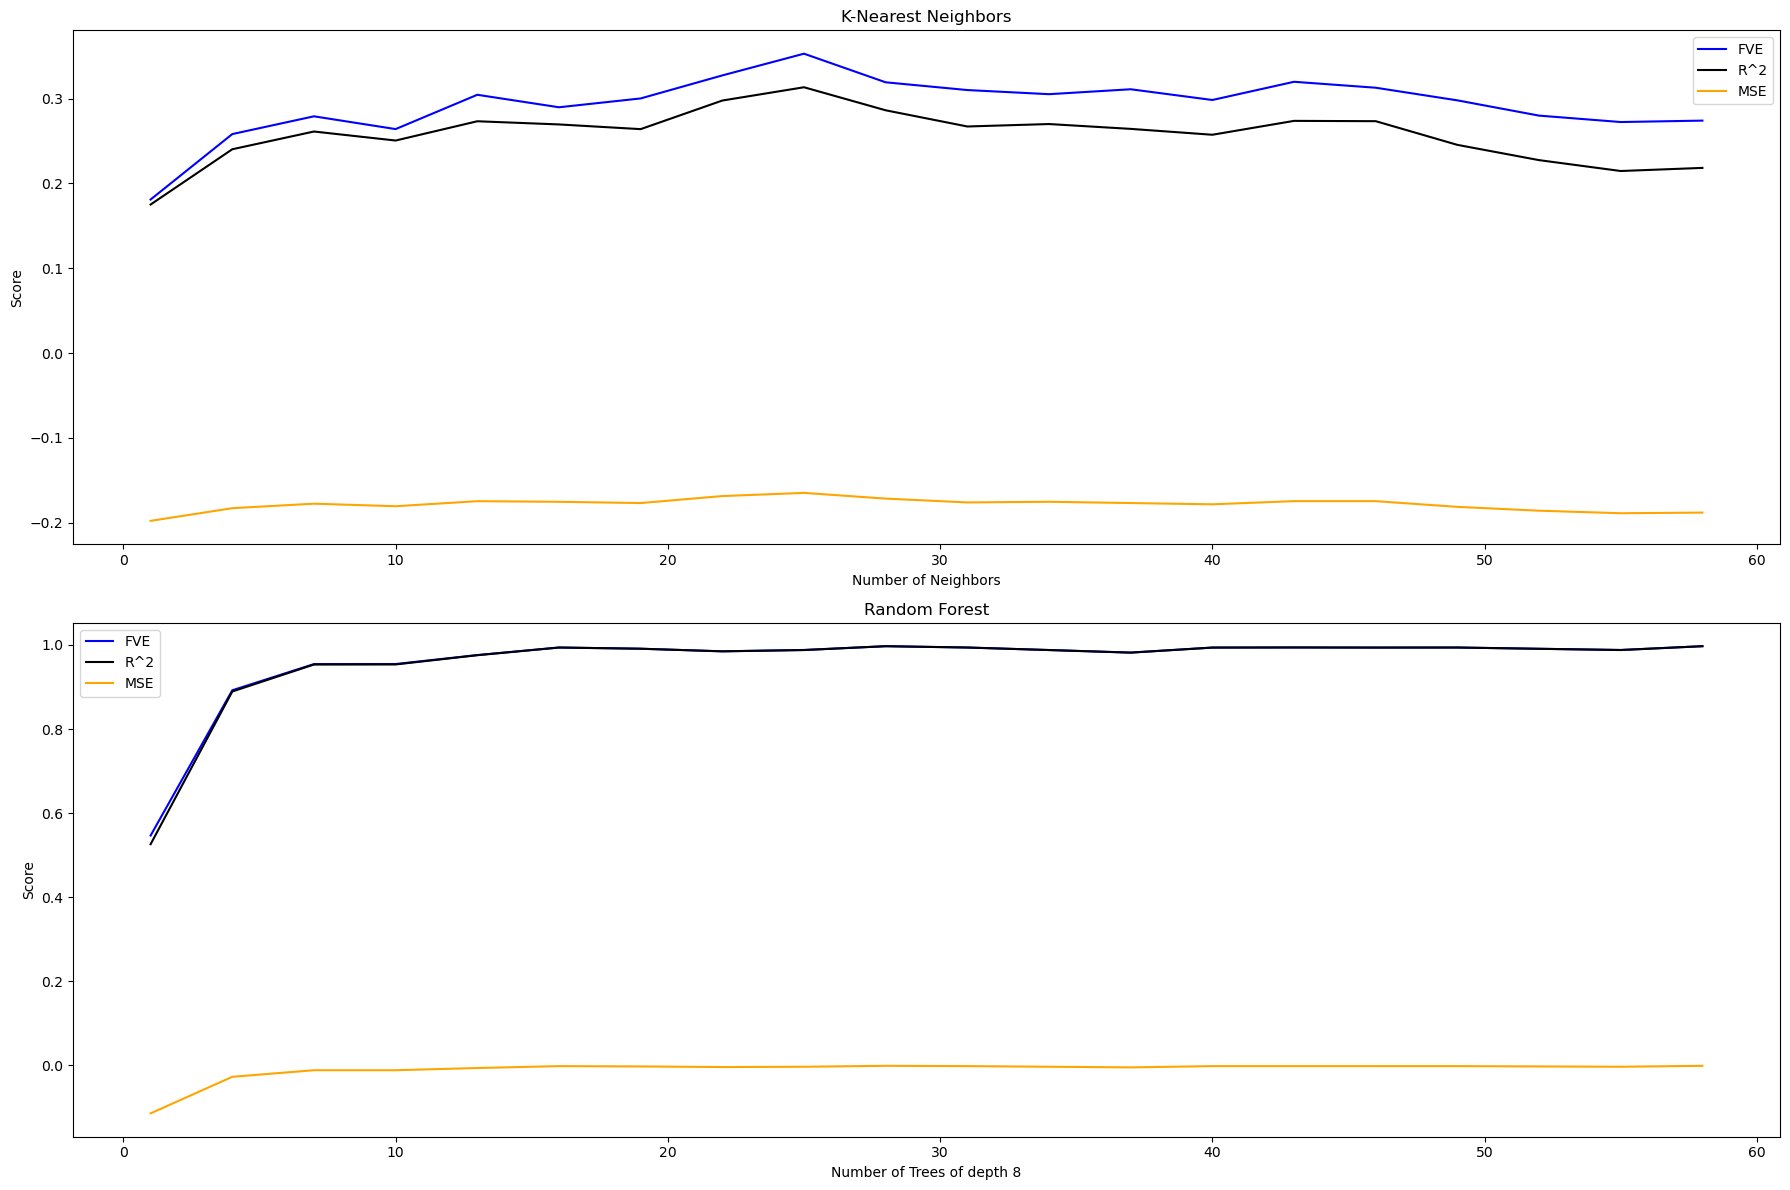

In [9]:
data = pd.read_csv("Data-Prepped-ELO-3-Groups.csv",index_col=0)
data = data.astype(np.float32)
#print(data.head(1))

#  as Y and all others (not including LeagueIndex) as X
X = data.iloc[:,4:]
Y = data.iloc[:,:2]
#transform input data (normalize)
ssc = SSc()
Xft = ssc.fit_transform(X)
X = pd.DataFrame(Xft)
print("Xtr(Xtrain),Xtst(Xtest),Ytr(Ytrain),Ytst(Ytest) shapes: ")
Xtr,Xtst,Ytr,Ytst = train_test_split(X,Y,test_size=0.2,random_state=2020)
print(Xtr.shape,Xtst.shape,Ytr.shape,Ytst.shape)

def testGraph(X,Y):
    scores = [
        [[],[],[]],  #K-Nearest Neighbors -- [test_FVE],[test_MSE],[test_R^2]
        [[],[],[]]   #Random Forest       -- [test_FVE],[test_MSE],[test_R^2]
    ]
    x = []
    
    RFDpth=8
    for l in range(1,60,3):
        x.append(l)
        dpth = l
        
        #KNN
        knn = KNC(n_neighbors=l)
        knn.fit(Xtr,Ytr)
        scr = cscore(knn,Xtst,Ytst)
        for k in scr.keys():
            if(k=='test_FVE'):
                scores[0][0].append(scr[k].mean())
            elif(k=='test_MSE'):
                scores[0][1].append(scr[k].mean())
            elif(k=='test_R2'):
                scores[0][2].append(scr[k].mean())
    
        #Random Forest
        forest = RFC(n_estimators=l,max_depth=RFDpth)
        forest.fit(Xtr,Ytr)
        scr = cscore(forest,Xtst,Ytst)
        for k in scr.keys():
            if(k=='test_FVE'):
                scores[1][0].append(scr[k].mean())
            elif(k=='test_MSE'):
                scores[1][1].append(scr[k].mean())
            elif(k=='test_R2'):
                scores[1][2].append(scr[k].mean())

        print('.', end="")
        if ((l+1)%10==0):
            print(l+1)
            
    print("\nPredicting a player's league")    
    fig,ax = plt.subplots(2, figsize=(18,12), dpi=100)
    ax[0].plot(x, scores[0][0], color='blue', label='FVE')
    ax[0].plot(x, scores[0][2], color='black', label='R^2' )
    ax[0].plot(x, scores[0][1], color='orange', label='MSE')
    ax[0].set_title("K-Nearest Neighbors")
    ax[0].set_xlabel("Number of Neighbors")
    
    ax[1].plot(x, scores[1][0], color='blue', label='FVE')
    ax[1].plot(x, scores[1][2], color='black', label='R^2' )
    ax[1].plot(x, scores[1][1], color='orange', label='MSE')
    ax[1].set_title("Random Forest")
    ax[1].set_xlabel(f"Number of Trees of depth {RFDpth}")
    
    for i in range(2):
        ax[i].legend()
        ax[i].set_ylabel("Score")
    plt.tight_layout()
    plt.show()
testGraph(X,Y)

##### While K-Nearest Neighbors still performs quite poorly, Random Forests can perform incredibly well once the 7 groups have been grouped together into low/medium/high ELO groups. I think that this is mostly due to the extreme similarity of adjacent leagues (except maybe grandmaster which has some notable variations from the norm as seen in "1 - Data Comprehension"), making it difficult to differentiate between them but when grouped the differences grow due to the distance between the leagues. 